In [1]:
import pydicom
import os
import numpy
import numpy as np
from matplotlib import pyplot, cm
import matplotlib.pyplot as plt
import cv2

In [2]:
PathDicom = "./train/"
lstFilesDCM = []  # create an empty list
DCM_names = []
contours = []
txt_names = []
for dirName, subdirList, fileList in os.walk(PathDicom):
    for filename in fileList:
        if ".dcm" in filename.lower():  # check whether the file's DICOM
            lstFilesDCM.append(os.path.join(dirName,filename))
            DCM_names.append(os.path.splitext(filename)[0])
        if ".txt" in filename.lower():  # check whether the file's txt
            contours.append(os.path.join(dirName,filename)) 
            txt_names.append(os.path.splitext(filename)[0])
            

In [3]:
# print(len(lstFilesDCM))
# print(len(contours))
# print(DCM_names[0])
# print(txt_names)

In [4]:
# Get ref file
RefDs = pydicom.read_file(lstFilesDCM[1])

# Load dimensions based on the number of rows, columns, and slices (along the Z axis)
ConstPixelDims = (int(RefDs.Rows), int(RefDs.Columns), len(lstFilesDCM))

# Load spacing values (in mm)
ConstPixelSpacing = (float(RefDs.PixelSpacing[0]), float(RefDs.PixelSpacing[1]), float(RefDs.SliceThickness))


In [5]:
print(ConstPixelDims)
print(ConstPixelSpacing)

(256, 216, 4183)
(0.68773234200743, 0.68773234200743, 7.0)


In [6]:
# loop through all the DICOM files
out_path = 'train_jpg/'
if not os.path.exists(out_path):
    os.makedirs(out_path)

indx = 0
for filenameDCM in lstFilesDCM:
    # read the file
    #print(filenameDCM)
    ds = pydicom.read_file(filenameDCM)
    #print(ds.pixel_array.shape)
    cv2.imwrite(out_path+DCM_names[indx]+'.jpg',ds.pixel_array)
    indx = indx+1
print( "Done :)")

Done :)


<class 'numpy.ndarray'>
(428, 2)
<class 'numpy.ndarray'>
(520, 2)
<class 'numpy.ndarray'>
(176, 2)
<class 'numpy.ndarray'>
(433, 2)
<class 'numpy.ndarray'>
(298, 2)
<class 'numpy.ndarray'>
(442, 2)
<class 'numpy.ndarray'>
(435, 2)
<class 'numpy.ndarray'>
(437, 2)
<class 'numpy.ndarray'>
(408, 2)
<class 'numpy.ndarray'>
(455, 2)
<class 'numpy.ndarray'>
(425, 2)
<class 'numpy.ndarray'>
(433, 2)
<class 'numpy.ndarray'>
(508, 2)
<class 'numpy.ndarray'>
(560, 2)
<class 'numpy.ndarray'>
(427, 2)
<class 'numpy.ndarray'>
(567, 2)
<class 'numpy.ndarray'>
(140, 2)


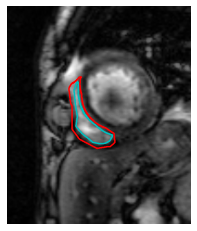

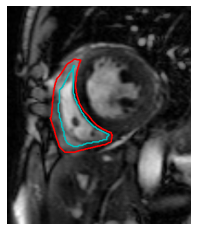

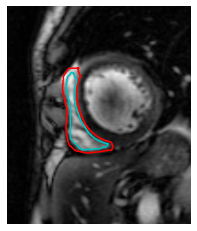

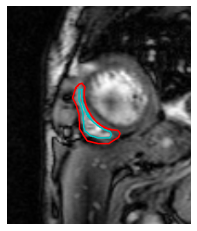

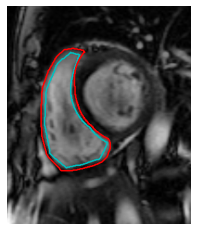

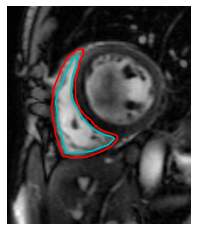

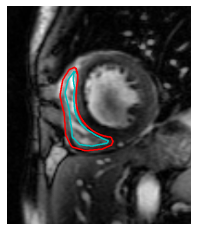

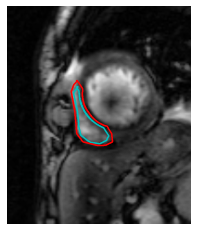

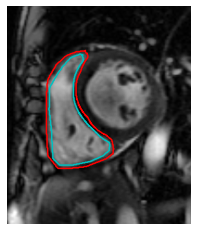

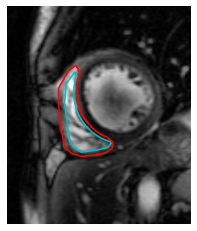

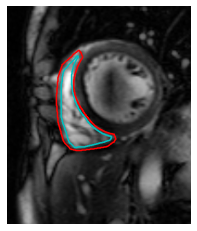

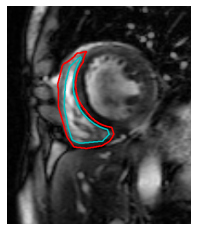

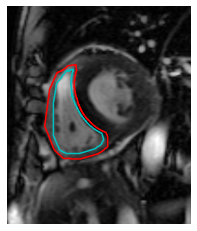

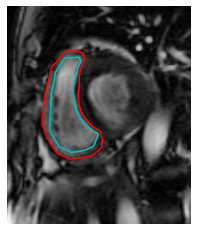

In [7]:
PathDicom = "./train/P16/"
import pandas as pd
from PIL import Image
lstFilesDCM = []  # create an empty list
DCM_names = []
contours = []
txt_names = []
for dirName, subdirList, fileList in os.walk(PathDicom):
    for filename in fileList:
        if ".dcm" in filename.lower():  # check whether the file's DICOM
            lstFilesDCM.append(os.path.join(dirName,filename))
            DCM_names.append(os.path.splitext(filename)[0])
        if ".txt" in filename.lower():  # check whether the file's txt
            contours.append(os.path.join(dirName,filename)) 
            txt_names.append(os.path.splitext(filename)[0])
out_path = 'masks_CLAHE/'
out_path_img = 'images_CLAHE/'
if not os.path.exists(out_path):
    os.makedirs(out_path)
if not os.path.exists(out_path_img):
    os.makedirs(out_path_img)
i = 0
for filenameDCM in lstFilesDCM:
    # read the file
    ds = pydicom.read_file(filenameDCM)
    img = ds.pixel_array
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    img = clahe.apply(img)
    print(type(img))
    im = Image.fromarray(img)
    im.save(out_path_img+DCM_names[i]+'.png')
    #ic = pd.read_csv(os.path.splitext(filenameDCM)[0]+'-icontour-manual.txt')
    ic = np.loadtxt(os.path.splitext(filenameDCM)[0]+'-icontour-manual.txt')
    print(ic.shape)
    Xi = ic[:,0]
    Yi = ic[:,1]
    oc = np.loadtxt(os.path.splitext(filenameDCM)[0]+'-ocontour-manual.txt')
    Xo = oc[:,0]
    Yo = oc[:,1]
    #fig = plt.figure(figsize=(ds.pixel_array.shape[0]*0.68773234200743,ds.pixel_array.shape[1]*0.68773234200743))
    fig = plt.figure()
    ax = fig.gca()
    ax.axis("off")
    ax.imshow(img,cmap = 'gray')
    ax.set_xticks(numpy.arange(0, ds.pixel_array.shape[0], 0.68773234200743))
    ax.set_yticks(numpy.arange(0, ds.pixel_array.shape[1], 0.68773234200743))
    ax.plot(Xi, Yi,'c')
    ax.plot(Xo,Yo,'r')
    fig.savefig(out_path+DCM_names[i]+'.png')
    i = i+1
    

<class 'numpy.ndarray'>
(87, 2)
<class 'numpy.ndarray'>
(450, 2)
<class 'numpy.ndarray'>
(445, 2)
<class 'numpy.ndarray'>
(405, 2)
<class 'numpy.ndarray'>
(453, 2)
<class 'numpy.ndarray'>
(442, 2)
<class 'numpy.ndarray'>
(390, 2)
<class 'numpy.ndarray'>
(405, 2)
<class 'numpy.ndarray'>
(453, 2)
<class 'numpy.ndarray'>
(16, 2)
<class 'numpy.ndarray'>
(444, 2)


/home/sahar/Env_p_3/lib/python3.6/site-packages/ipykernel_launcher.py:43: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/sahar/Env_p_3/lib/python3.6/site-packages/ipykernel_launcher.py:51: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<class 'numpy.ndarray'>
(445, 2)


/home/sahar/Env_p_3/lib/python3.6/site-packages/ipykernel_launcher.py:43: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/sahar/Env_p_3/lib/python3.6/site-packages/ipykernel_launcher.py:51: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<class 'numpy.ndarray'>
(414, 2)


/home/sahar/Env_p_3/lib/python3.6/site-packages/ipykernel_launcher.py:43: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/sahar/Env_p_3/lib/python3.6/site-packages/ipykernel_launcher.py:51: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<class 'numpy.ndarray'>
(416, 2)


/home/sahar/Env_p_3/lib/python3.6/site-packages/ipykernel_launcher.py:43: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/sahar/Env_p_3/lib/python3.6/site-packages/ipykernel_launcher.py:51: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<class 'numpy.ndarray'>
(16, 2)


/home/sahar/Env_p_3/lib/python3.6/site-packages/ipykernel_launcher.py:43: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/sahar/Env_p_3/lib/python3.6/site-packages/ipykernel_launcher.py:51: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<class 'numpy.ndarray'>
(414, 2)


/home/sahar/Env_p_3/lib/python3.6/site-packages/ipykernel_launcher.py:43: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/sahar/Env_p_3/lib/python3.6/site-packages/ipykernel_launcher.py:51: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<class 'numpy.ndarray'>
(442, 2)


/home/sahar/Env_p_3/lib/python3.6/site-packages/ipykernel_launcher.py:43: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/sahar/Env_p_3/lib/python3.6/site-packages/ipykernel_launcher.py:51: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<class 'numpy.ndarray'>
(276, 2)


/home/sahar/Env_p_3/lib/python3.6/site-packages/ipykernel_launcher.py:43: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/sahar/Env_p_3/lib/python3.6/site-packages/ipykernel_launcher.py:51: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


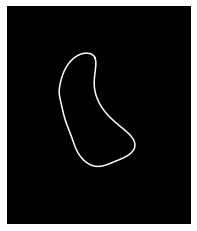

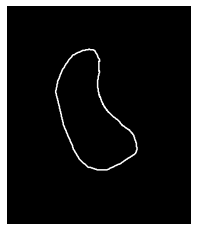

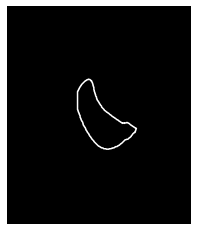

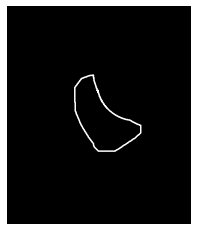

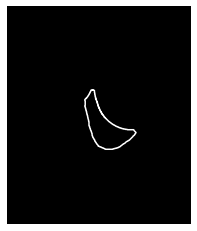

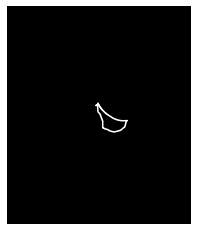

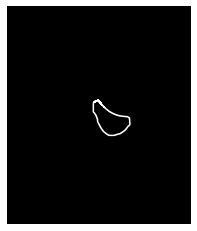

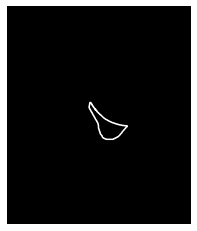

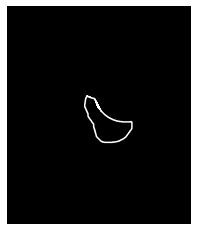

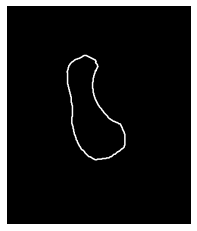

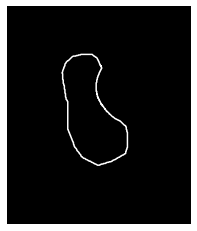

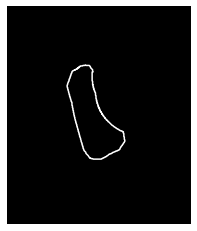

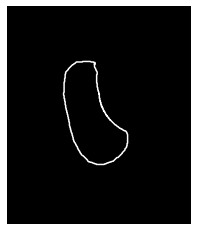

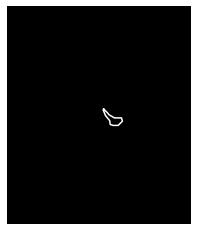

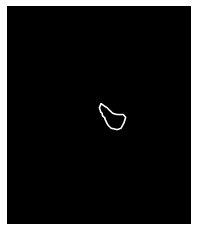

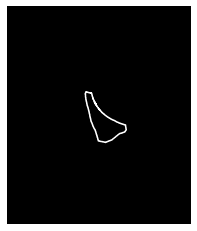

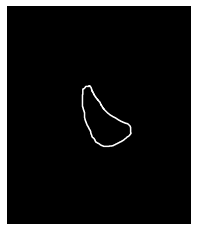

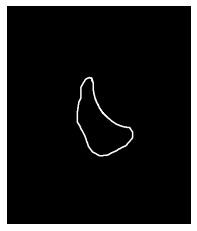

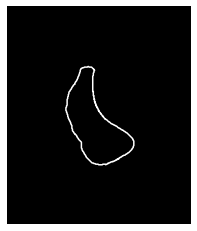

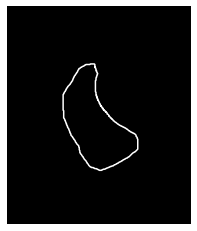

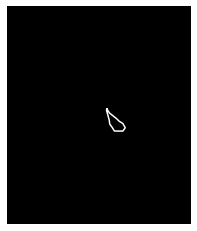

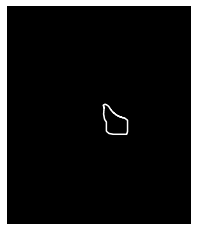

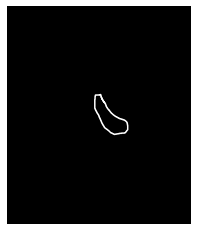

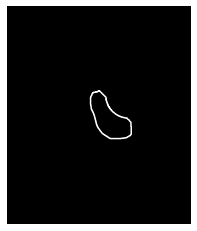

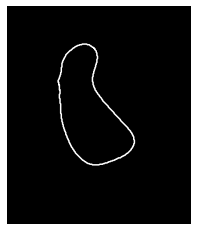

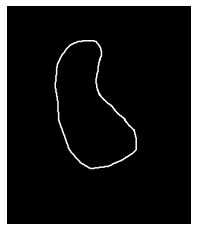

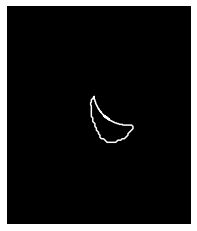

In [8]:
PathDicom = "./train/P13/"
import pandas as pd
from PIL import Image
lstFilesDCM = []  # create an empty list
DCM_names = []
contours = []
txt_names = []
for dirName, subdirList, fileList in os.walk(PathDicom):
    for filename in fileList:
        if ".dcm" in filename.lower():  # check whether the file's DICOM
            lstFilesDCM.append(os.path.join(dirName,filename))
            DCM_names.append(os.path.splitext(filename)[0])
        if ".txt" in filename.lower():  # check whether the file's txt
            contours.append(os.path.join(dirName,filename)) 
            txt_names.append(os.path.splitext(filename)[0])
out_path = 'masks_CLAHE_many/'
out_path_img = 'images_CLAHE_many/'
if not os.path.exists(out_path):
    os.makedirs(out_path)
if not os.path.exists(out_path_img):
    os.makedirs(out_path_img)
i = 0
for filenameDCM in lstFilesDCM:
    # read the file
    ds = pydicom.read_file(filenameDCM)
    img = ds.pixel_array
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    img = clahe.apply(img)
    print(type(img))
    im = Image.fromarray(img)
    im.save(out_path_img+DCM_names[i]+'.png')
    #ic = pd.read_csv(os.path.splitext(filenameDCM)[0]+'-icontour-manual.txt')
    background = np.zeros((ds.pixel_array.shape))
    
    ic = np.loadtxt(os.path.splitext(filenameDCM)[0]+'-icontour-manual.txt')
    print(ic.shape)
    Xi = ic[:,0]
    Yi = ic[:,1]
    oc = np.loadtxt(os.path.splitext(filenameDCM)[0]+'-ocontour-manual.txt')
    Xo = oc[:,0]
    Yo = oc[:,1]
    #fig = plt.figure(figsize=(ds.pixel_array.shape[0]*0.68773234200743,ds.pixel_array.shape[1]*0.68773234200743))
    fig = plt.figure()
    ax = fig.gca()
    ax.axis("off")
    ax.imshow(background,cmap = 'gray')
    ax.set_xticks(numpy.arange(0, ds.pixel_array.shape[0], 0.68773234200743))
    ax.set_yticks(numpy.arange(0, ds.pixel_array.shape[1], 0.68773234200743))
    ax.plot(Xi, Yi,'w')
    fig.savefig(out_path+'ic'+DCM_names[i]+'.png')
    fig2 = plt.figure()
    ax2 = fig2.gca()
    ax2.axis("off")
    ax2.imshow(background,cmap = 'gray')
    ax2.set_xticks(numpy.arange(0, ds.pixel_array.shape[0], 0.68773234200743))
    ax2.set_yticks(numpy.arange(0, ds.pixel_array.shape[1], 0.68773234200743))
    ax2.plot(Xo, Yo,'w')
    fig2.savefig(out_path+'oc'+DCM_names[i]+'.png')
    i = i+1
    

<class 'numpy.ndarray'>
(428, 2)
<class 'numpy.ndarray'>
(520, 2)
<class 'numpy.ndarray'>
(176, 2)
<class 'numpy.ndarray'>
(433, 2)
<class 'numpy.ndarray'>
(298, 2)
<class 'numpy.ndarray'>
(442, 2)
<class 'numpy.ndarray'>
(435, 2)
<class 'numpy.ndarray'>
(437, 2)
<class 'numpy.ndarray'>
(408, 2)
<class 'numpy.ndarray'>
(455, 2)
<class 'numpy.ndarray'>
(425, 2)
<class 'numpy.ndarray'>
(433, 2)
<class 'numpy.ndarray'>
(508, 2)
<class 'numpy.ndarray'>
(560, 2)
<class 'numpy.ndarray'>
(427, 2)
<class 'numpy.ndarray'>
(567, 2)
<class 'numpy.ndarray'>
(140, 2)


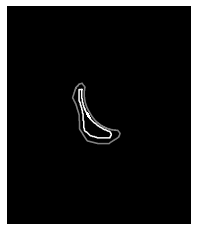

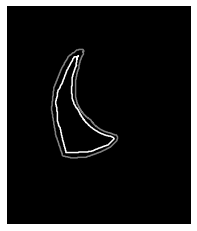

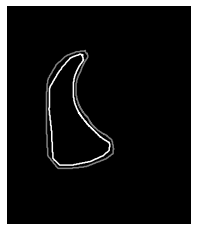

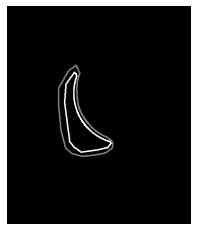

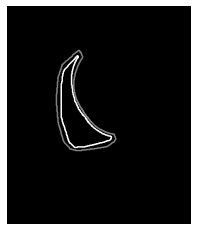

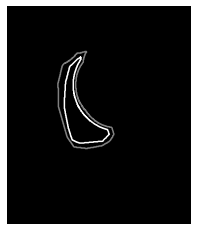

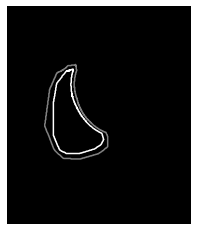

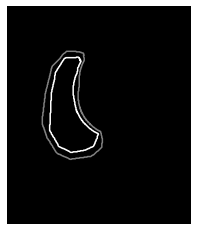

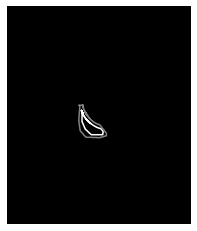

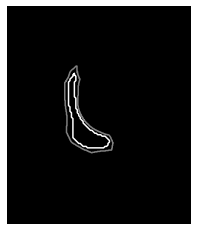

In [9]:
PathDicom = "./train/P16/"
import pandas as pd
from PIL import Image
lstFilesDCM = []  # create an empty list
DCM_names = []
contours = []
txt_names = []
for dirName, subdirList, fileList in os.walk(PathDicom):
    for filename in fileList:
        if ".dcm" in filename.lower():  # check whether the file's DICOM
            lstFilesDCM.append(os.path.join(dirName,filename))
            DCM_names.append(os.path.splitext(filename)[0])
        if ".txt" in filename.lower():  # check whether the file's txt
            contours.append(os.path.join(dirName,filename)) 
            txt_names.append(os.path.splitext(filename)[0])
out_path = 'masks_CLAHE_one/'
out_path_img = 'images_CLAHE_one/'
if not os.path.exists(out_path):
    os.makedirs(out_path)
if not os.path.exists(out_path_img):
    os.makedirs(out_path_img)
i = 0
for filenameDCM in lstFilesDCM:
    # read the file
    ds = pydicom.read_file(filenameDCM)
    img = ds.pixel_array
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    img = clahe.apply(img)
    print(type(img))
    im = Image.fromarray(img)
    im.save(out_path_img+DCM_names[i]+'.png')
    #ic = pd.read_csv(os.path.splitext(filenameDCM)[0]+'-icontour-manual.txt')
    background = np.zeros((ds.pixel_array.shape))
    
    ic = np.loadtxt(os.path.splitext(filenameDCM)[0]+'-icontour-manual.txt')
    print(ic.shape)
    Xi = ic[:,0]
    Yi = ic[:,1]
    oc = np.loadtxt(os.path.splitext(filenameDCM)[0]+'-ocontour-manual.txt')
    Xo = oc[:,0]
    Yo = oc[:,1]
    #fig = plt.figure(figsize=(ds.pixel_array.shape[0]*0.68773234200743,ds.pixel_array.shape[1]*0.68773234200743))
    fig = plt.figure()
    ax = fig.gca()
    ax.axis("off")
    ax.imshow(background,cmap = 'gray')
    ax.set_xticks(numpy.arange(0, ds.pixel_array.shape[0], 0.68773234200743))
    ax.set_yticks(numpy.arange(0, ds.pixel_array.shape[1], 0.68773234200743))
    ax.plot(Xi, Yi,'w')
    ax.plot(Xo, Yo,'gray')
    fig.savefig(out_path+'mask'+DCM_names[i]+'.png')
    i = i+1
    

(356, 2)
(565, 2)
(472, 2)
(431, 2)
(17, 2)
(15, 2)
(15, 2)
(20, 2)
(489, 2)
(17, 2)
(9, 2)
(20, 2)
(437, 2)


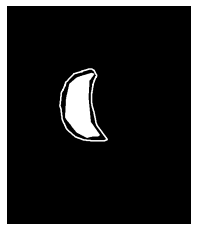

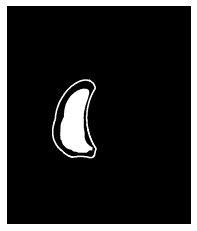

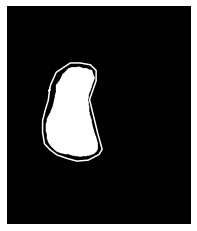

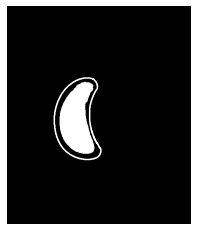

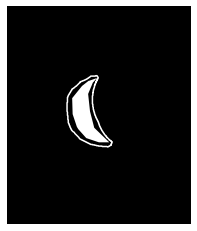

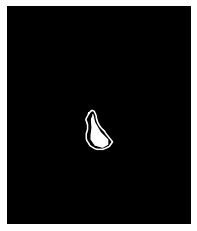

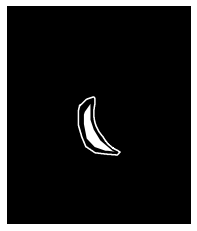

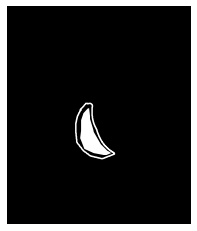

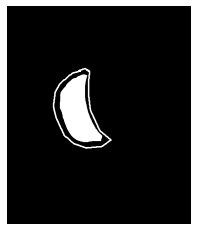

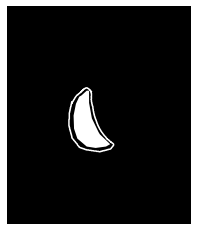

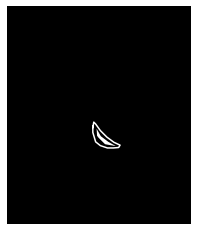

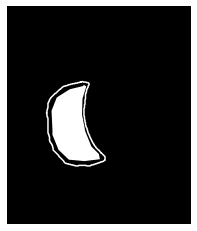

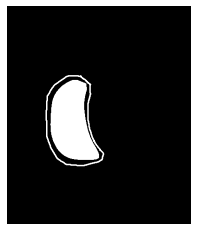

In [26]:
PathDicom = "./train/P15/"
import pandas as pd
from PIL import Image
lstFilesDCM = []  # create an empty list
DCM_names = []
contours = []
txt_names = []
for dirName, subdirList, fileList in os.walk(PathDicom):
    for filename in fileList:
        if ".dcm" in filename.lower():  # check whether the file's DICOM
            lstFilesDCM.append(os.path.join(dirName,filename))
            DCM_names.append(os.path.splitext(filename)[0])
        if ".txt" in filename.lower():  # check whether the file's txt
            contours.append(os.path.join(dirName,filename)) 
            txt_names.append(os.path.splitext(filename)[0])
out_path = 'masks_two_fill/'
out_path_img = 'images_two_fill/'
if not os.path.exists(out_path):
    os.makedirs(out_path)
if not os.path.exists(out_path_img):
    os.makedirs(out_path_img)
i = 0
for filenameDCM in lstFilesDCM:
    # read the file
    ds = pydicom.read_file(filenameDCM)
    img = ds.pixel_array
    im = Image.fromarray(img)
    cv2.imwrite(out_path_img+DCM_names[i]+'.jpg',img)
    #ic = pd.read_csv(os.path.splitext(filenameDCM)[0]+'-icontour-manual.txt')
    background = np.zeros((ds.pixel_array.shape))
    
    ic = np.loadtxt(os.path.splitext(filenameDCM)[0]+'-icontour-manual.txt')
    print(ic.shape)
    Xi = ic[:,0]
    Yi = ic[:,1]
    oc = np.loadtxt(os.path.splitext(filenameDCM)[0]+'-ocontour-manual.txt')
    Xo = oc[:,0]
    Yo = oc[:,1]
    #fig = plt.figure(figsize=(ds.pixel_array.shape[0]*0.68773234200743,ds.pixel_array.shape[1]*0.68773234200743))
    fig = plt.figure()
    ax = fig.gca()
    ax.axis("off")
    ax.imshow(background,cmap = 'gray')
    ax.set_xticks(numpy.arange(0, ds.pixel_array.shape[0], 0.68773234200743))
    ax.set_yticks(numpy.arange(0, ds.pixel_array.shape[1], 0.68773234200743))
    ax.fill_between(Xi, Yi,facecolor='w')
    ax.plot(Xo, Yo,'w')
    fig.savefig(out_path+'mask'+DCM_names[i]+'.jpg')
    i = i+1
    